Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Reading and Droping

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [4]:
data=data.drop(["User ID"],axis=1)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Exploratory Data analysis

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


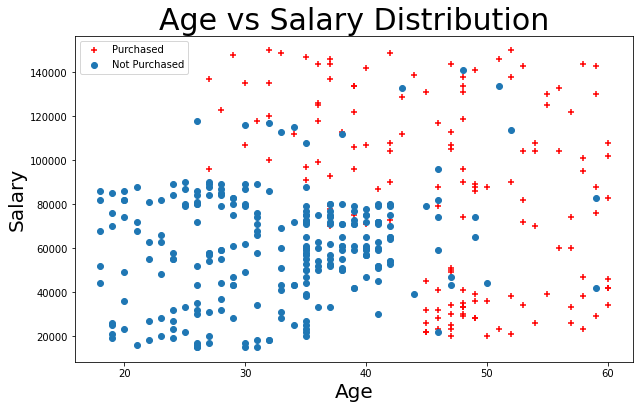

In [5]:
one=data.loc[data['Purchased']==1]
zero=data.loc[data['Purchased']==0]
plt.figure(figsize=(10, 6))
plt.scatter(one["Age"],one["EstimatedSalary"], color='r',marker="+",label="Purchased")
plt.scatter(zero["Age"],zero["EstimatedSalary"], marker="o",label="Not Purchased")
plt.title('Age vs Salary Distribution',fontdict={'fontname':'Comic Sans MS','fontsize':30})
plt.xlabel('Age',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.ylabel('Salary',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.legend()
plt.show()

Data Loading

In [6]:
df=data.values
X=df[:,:-1]
m=len(X)
y=df[:,-1].reshape(m,1)

Feature Scalling using mean normalization

In [7]:
def feature_scalling(X):
  mean=np.mean(X,axis=0)
  std=np.std(X,axis=0)
  X_normal=(X-mean)/std
  return X_normal,mean,std

Hypothesis


In [8]:
def hypothesis(X,theta):
  z=np.dot(X,theta)
  predictions=sigmoid(z)
  return predictions

Sigmoid

In [9]:
def sigmoid(z):
  return 1.0/(1+np.exp(-1*z))

Cost Function and Gradient

In [10]:
def cost_function(X,y,theta):
  m=X.shape[0]
  predictions=hypothesis(X,theta)
  cost=(-y*np.log(predictions))-((1-y)*np.log(1-predictions))
  gradient=np.dot(X.T,predictions-y)
  return sum(cost)/m,gradient/m

Gradient Descent

In [11]:
def gradient_descent(X,y,alpha,epochs):
  m,n=X.shape
  theta=np.zeros((n,1))
  history=[]

  for i in range(epochs):
    predictions=hypothesis(X,theta)
    hist,grad=cost_function(X,y,theta)
    history.append(hist)
    descent=alpha*grad
    theta-=descent
  return theta,history

Running the Model

In [12]:
X,X_mean,X_std=feature_scalling(X)
X=np.append(np.ones((m,1)),X,axis=1)
theta,history=gradient_descent(X,y,0.1,500)

Hypothesis Generated

In [13]:
print("h(x) = " +str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1 + "+str(round(theta[2,0],2))+"x2")

h(x) = -1.03 + 2.17x1 + 1.09x2


Cost Function as gradient descent moves towards the Global Minimum

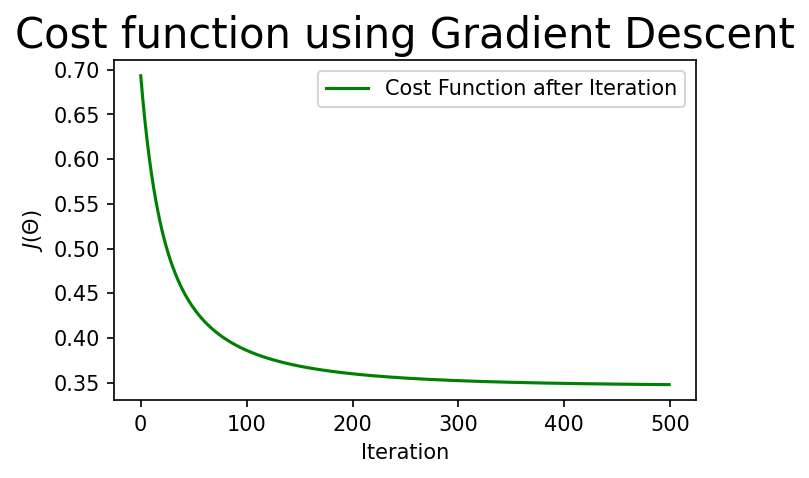

In [14]:
plt.figure(figsize=(5,3),dpi=150)
colors="green"
plt.plot(history,color=colors,label="Cost Function after Iteration")
plt.legend()
plt.title("Cost function using Gradient Descent",fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.show()

Scatter Plot with Hypothesis Line

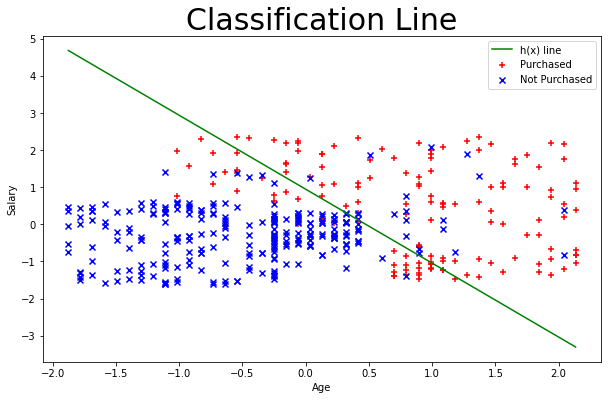

In [15]:
pos , neg = (y==1).reshape(400,1) , (y==0).reshape(400,1)
plt.figure(figsize=(10, 6))
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Purchased")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not Purchased")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g",label="h(x) line")
plt.title('Classification Line',fontdict={'fontname':'Comic Sans MS','fontsize':30})
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

Prediction


In [16]:
def predict(theta,X,X_mean,X_std,a,b):
  X_test=np.array([a,b])
  X_test=(X_test-X_mean)/X_std
  X_test=np.append(np.ones(1),X_test)
  result=sigmoid(X_test.dot(theta))
  if result<0.5:
    print("For a Person with age {} and salary {} ,its highly unlikely.".format(a,b))
  else:
    print("For a Person with age {} and salary {} ,its highly likely.".format(a,b))

Value Input and Result


In [17]:
a=int(input("Enter the Age: "))
b=int(input("Enter the salary: "))
predict(theta,X,X_mean,X_std,a,b)

Enter the Age: 21
Enter the salary: 45000
For a Person with age 21 and salary 45000 ,its highly unlikely.


In [18]:
a=int(input("Enter the Age: "))
b=int(input("Enter the salary: "))
predict(theta,X,X_mean,X_std,a,b)

Enter the Age: 50
Enter the salary: 30000
For a Person with age 50 and salary 30000 ,its highly likely.


End